In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

from explore import group_tenure, group_monthly_charges, start_explore, plot_data, get_dsl_fiber_sig
from scipy import stats
alpha = 0.01

In [2]:
df = start_explore()

In [3]:
# What does the customer who churns look like?
with pd.option_context('display.max_columns', None):
    display(df[df.churn == 'Yes'].describe())

,Unnamed: 0,churn_enc,tenure,tenure_years,tenure_nml,monthly_charges,monthly_charges_nml,total_charges,total_charges_nml,senior_citizen,gender_enc,family_support,phone_service_enc,contract_type_id,internet_service_type_id,extra_lines,internet_services,has_internet,online_security_enc,online_backup_enc,device_protection_enc,tech_support_enc,streaming_tv_enc,streaming_movies_enc,paperless_billing_enc,pay_elec_check,pay_mail,pay_bank,pay_cc,pay_auto
count,1187.000,1187.000,1187.000,1187.000,1187.000,1187.000,1187.000,1187.000,1187.000,1187.000,1187.000,1187.000,1187.000,1187.000,1187.000,1187.000,1187.000,1187.000,1187.000,1187.000,1187.000,1187.000,1187.000,1187.000,1187.000,1187.000,1187.000,1187.000,1187.000,1187.000
mean,2257.068,1.000,17.833,1.485,-0.584,74.097,0.271,1515.656,-0.387,0.265,0.506,0.592,0.908,1.130,1.810,1.360,2.650,0.943,0.146,0.270,0.280,0.160,0.422,0.429,0.767,0.573,0.162,0.143,0.122,0.265
std,1325.370,0.000,19.440,1.621,0.853,24.477,0.791,1875.806,0.962,0.442,0.500,0.861,0.289,0.407,0.519,0.644,1.555,0.232,0.353,0.444,0.449,0.367,0.494,0.495,0.423,0.495,0.368,0.350,0.328,0.442
min,3.000,1.000,1.000,0.080,-1.691,18.850,-2.600,18.850,-3.350,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,1330.000,1.000,2.000,0.170,-1.248,55.825,-0.288,115.525,-1.150,0.000,0.000,0.000,1.000,1.000,2.000,1.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000
50%,2179.000,1.000,10.000,0.830,-0.605,79.550,0.292,676.700,-0.419,0.000,1.000,0.000,1.000,1.000,2.000,1.000,2.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000
75%,2987.500,1.000,29.000,2.420,0.013,93.825,0.834,2351.350,0.335,1.000,1.000,1.000,1.000,1.000,2.000,2.000,4.000,1.000,0.000,1.000,1.000,0.000,1.000,1.000,1.000,1.000,0.000,0.000,0.000,1.000
max,6951.000,1.000,72.000,6.000,5.199,117.450,2.742,8127.600,2.390,1.000,1.000,3.000,1.000,3.000,3.000,2.000,7.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [85]:
df.columns.to_list()

['Unnamed: 0',
 'customer_id',
 'churn',
 'churn_enc',
 'tenure',
 'tenure_years',
 'tenure_nml',
 'monthly_charges',
 'monthly_charges_nml',
 'total_charges',
 'total_charges_nml',
 'senior_citizen',
 'gender_enc',
 'family_support',
 'phone_service_enc',
 'contract_type_id',
 'internet_service_type_id',
 'extra_lines',
 'internet_services',
 'has_internet',
 'online_security_enc',
 'online_backup_enc',
 'device_protection_enc',
 'tech_support_enc',
 'streaming_tv_enc',
 'streaming_movies_enc',
 'paperless_billing_enc',
 'pay_elec_check',
 'pay_mail',
 'pay_bank',
 'pay_cc',
 'pay_auto',
 'monthly_charges_group',
 'tenure_group']

# 1. Are there clear groupings in tenure where a customer is more likely to churn? 
- $H_0$: There are no cohorts who have a higher rate of churn than other cohorts
- $H_a$: There is a cohort with a higher rate of churn than others

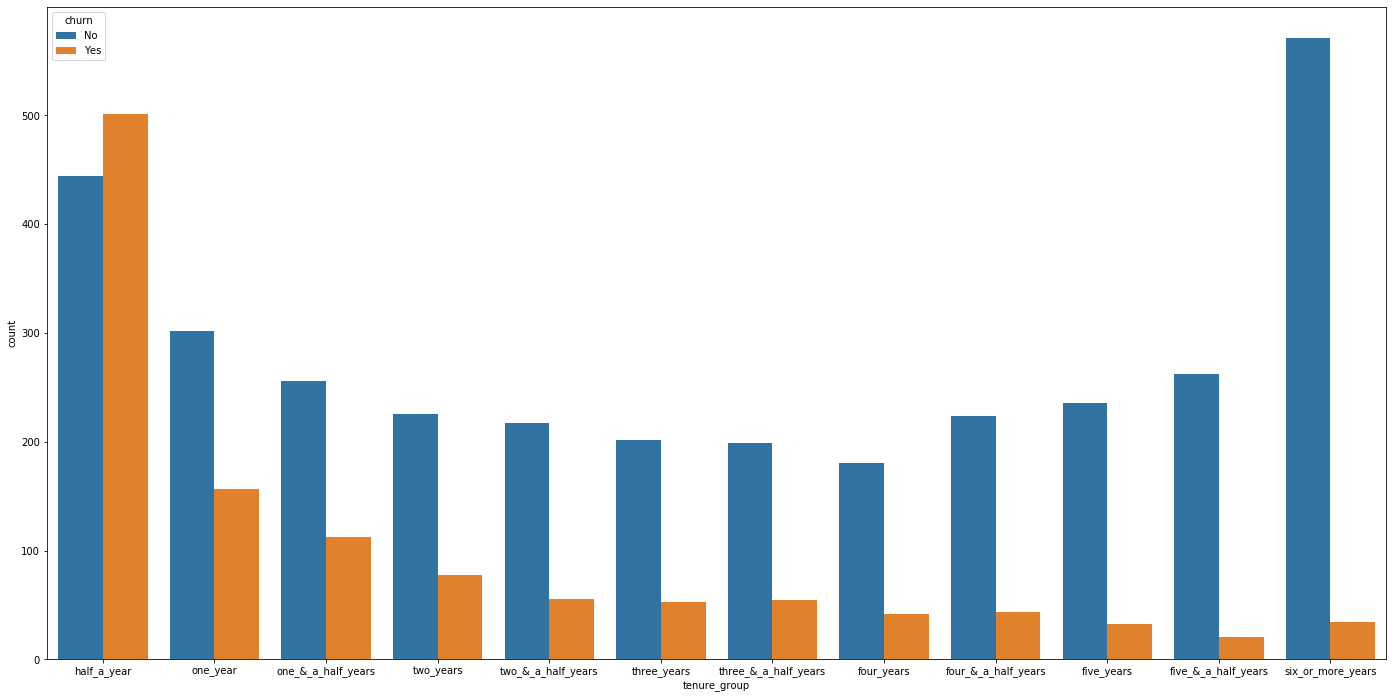

In [4]:
tenure_group_list = ['half_a_year', 'one_year','one_&_a_half_years', 'two_years', 'two_&_a_half_years',  'three_years', 'three_&_a_half_years',  'four_years', 'four_&_a_half_years', 'five_years',  'five_&_a_half_years', 'six_or_more_years']

plt.figure(figsize=(24,12))
sns.countplot(x='tenure_group', data=df, hue='churn', order = tenure_group_list) 

- given the graph above, we can see that half_a_year contract cohorts are more likely to churn

In [5]:
df.tenure_group.value_counts()

half_a_year             945
six_or_more_years       605
one_year                459
one_&_a_half_years      369
two_years               304
five_&_a_half_years     283
two_&_a_half_years      273
five_years              269
four_&_a_half_years     268
three_years             255
three_&_a_half_years    254
four_years              223
Name: tenure_group, dtype: int64

In [6]:
# clearly, half_a_year churn more then any other tenure_group
half_yr = df[df.tenure_group == 'half_a_year'].churn_enc
not_half_yr =df[df.tenure_group != 'half_a_year'].churn_enc

s, p = stats.ttest_ind(half_yr, not_half_yr)

if p < alpha:
    print(f'Since p-value {p} is less then alpha: {alpha}, we reject the null hypothesis that there are no cohorts with a higher churn rate then the others')
    print('- half_a_year cohort has the highest churn rate')
else:
    print(f'Since p-value {p} is greater then alpha:{alpha}, we fail to reject the null hypothesisthat there are no cohorts with a higher churn rate then the others')

Since p-value 2.5386936787599385e-102 is less then alpha: 0.01, we reject the null hypothesis that there are no cohorts with a higher churn rate then the others
- half_a_year cohort has the highest churn rate


# 2. Are there features that indicate a higher propensity to churn? 
- $H_0$: There are no features who have a higher rate of churn than other features
- $H_a$: Senior citizens have a higher rate of churn 
- $H_a$: Month-to-month contracts have a higher rate of churn 
- $H_a$: Two-year contracts have a higher rate of churn
- $H_a$: People that pay by electronic check have a higher rate of churn 
- $H_a$: 

In [7]:
DSL = df[df.phone_service_enc == 0][df.contract_type_id == 1]
FO = df[df.phone_service_enc == 0][df.contract_type_id == 2]
DSL2 = df[df.contract_type_id == 1]
FO2 = df[df.contract_type_id == 2]

In [8]:
# Here i'll turn each of those categories into variables and look at their rate of churn

num_internet_only = df[df.has_internet == 1][df.phone_service_enc == 0][df.internet_services == 1].shape[0]
internet_only_churn = df[df.has_internet == 1][df.phone_service_enc == 0][df.internet_services == 1][df.churn == 'Yes'].shape[0]
internet_rate = (internet_only_churn / num_internet_only)

num_phone_only = df[df.has_internet == 0][df.phone_service_enc == 1].shape[0]
phone_only_churn = df[df.has_internet == 0][df.phone_service_enc == 1][df.churn == 'Yes'].shape[0]
phone_rate = (phone_only_churn / num_phone_only)

num_all = df.shape[0]
num_churn = df[df.churn == 'Yes'].shape[0]
all_rate = (num_churn / num_all)

# customers without phone
num_DSL = DSL.shape[0]
DSL_churn = DSL[df.churn == 'Yes'].shape[0]
DSL_rate = (DSL_churn / num_DSL)

num_FO = FO.shape[0]
FO_churn = FO[df.churn == 'Yes'].shape[0]
FO_rate = (FO_churn / num_FO)

# all DSL customers, even with phone
num_DSL2 = DSL2.shape[0]
DSL2_churn = DSL2[df.churn == 'Yes'].shape[0]
DSL2_rate = (DSL2_churn / num_DSL2)

# all Fiber Optic customers, even with phone
num_FO2 = FO2.shape[0]
FO2_churn = FO2[df.churn == 'Yes'].shape[0]
FO2_rate = (FO2_churn / num_FO2)

print (f'Rate of churn for people who have DSL: {DSL2_rate}')
print (f'Rate of churn for people who have Fiber Optic: {FO2_rate}')
print (f'Rate of churn for people who only have DSL: {DSL_rate}')
print (f'Rate of churn for people who only have Fiber Optic: {FO_rate}')
print (f'Rate of churn for people who only have internet: {internet_rate}')
print (f'Rate of churn for people who only have phone: {phone_rate}')
print (f'Overal rate of churn: {all_rate}')

Rate of churn for people who have DSL: 0.42508989212944465
Rate of churn for people who have Fiber Optic: 0.09818569903948772
Rate of churn for people who only have DSL: 0.3937007874015748
Rate of churn for people who only have Fiber Optic: 0.08045977011494253
Rate of churn for people who only have internet: 0.43103448275862066
Rate of churn for people who only have phone: 0.07075962539021852
Overal rate of churn: 0.26336809407588196


- we can see that people who have DSL has the highest churn rate
### Are the other featuers that influence churn rate

<Figure size 576x432 with 0 Axes>

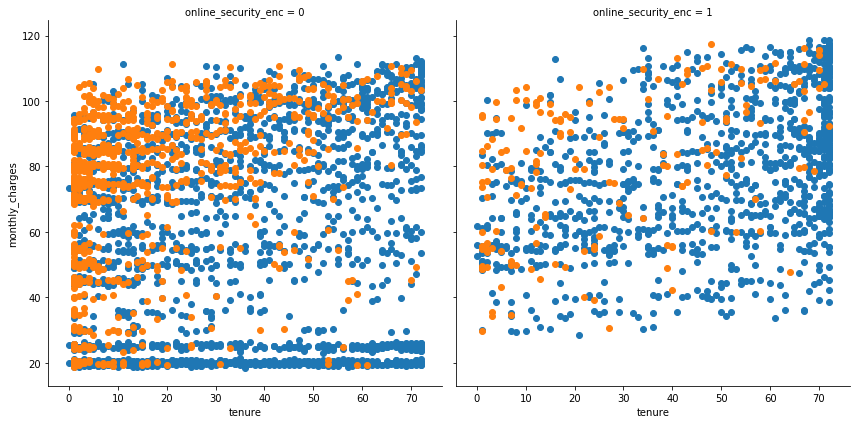

In [9]:
h = 6
plt.figure(figsize=(8,6))
g = sns.FacetGrid(df, col="online_security_enc", hue='churn', margin_titles=True, height=h)
g.map(plt.scatter, "tenure", "monthly_charges")

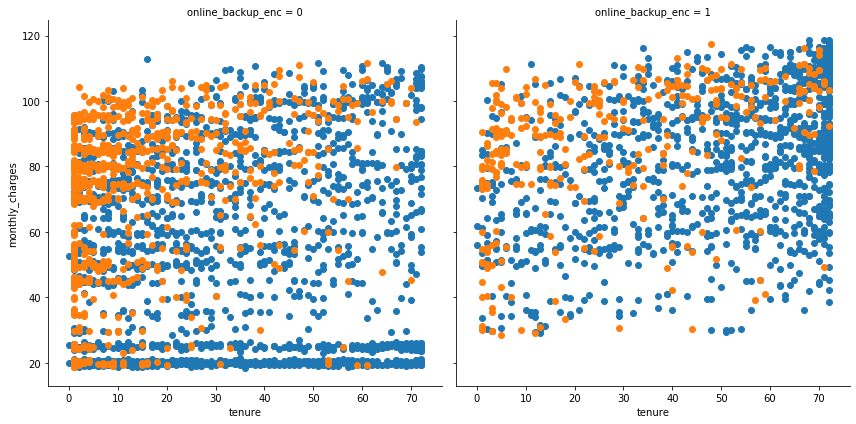

In [10]:
g = sns.FacetGrid(df, col="online_backup_enc", hue='churn', margin_titles=True, height=h)
g.map(plt.scatter, "tenure", "monthly_charges")

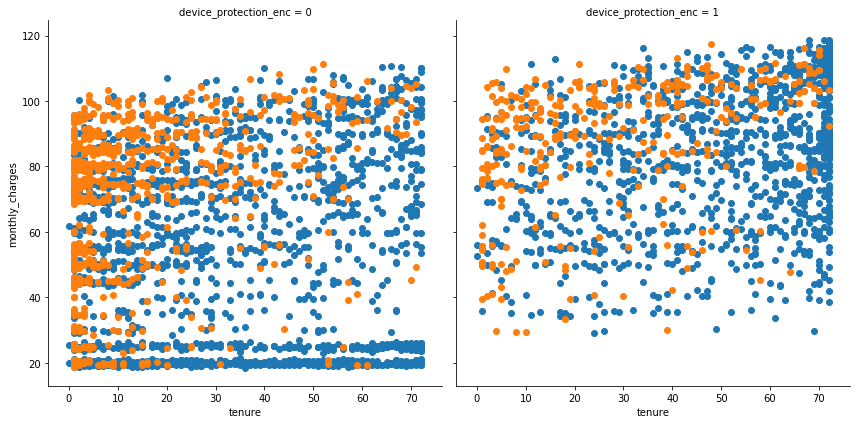

In [11]:
g = sns.FacetGrid(df, col="device_protection_enc", hue='churn', margin_titles=True, height=h)
g.map(plt.scatter, "tenure", "monthly_charges")

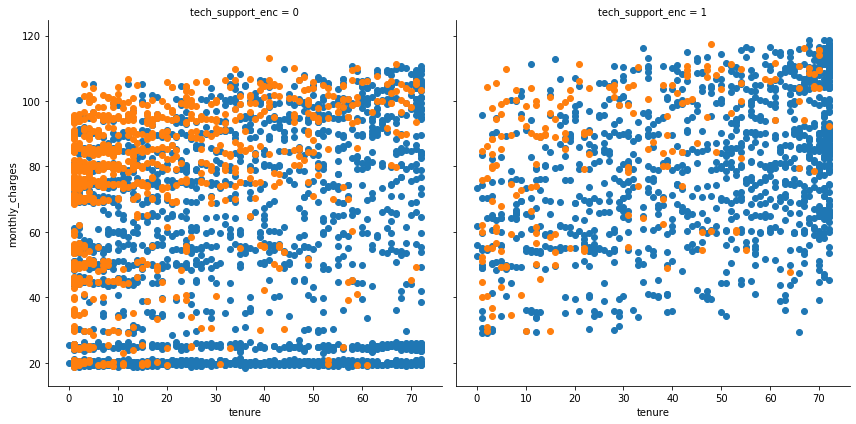

In [12]:
g = sns.FacetGrid(df, col="tech_support_enc", hue='churn', margin_titles=True, height=h)
g.map(plt.scatter, "tenure", "monthly_charges")

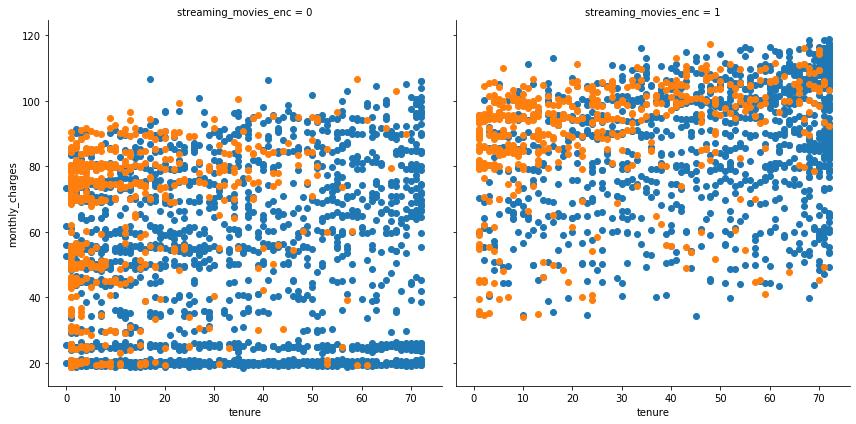

In [13]:
g = sns.FacetGrid(df, col="streaming_movies_enc", hue='churn', margin_titles=True, height=h)
g.map(plt.scatter, "tenure", "monthly_charges")

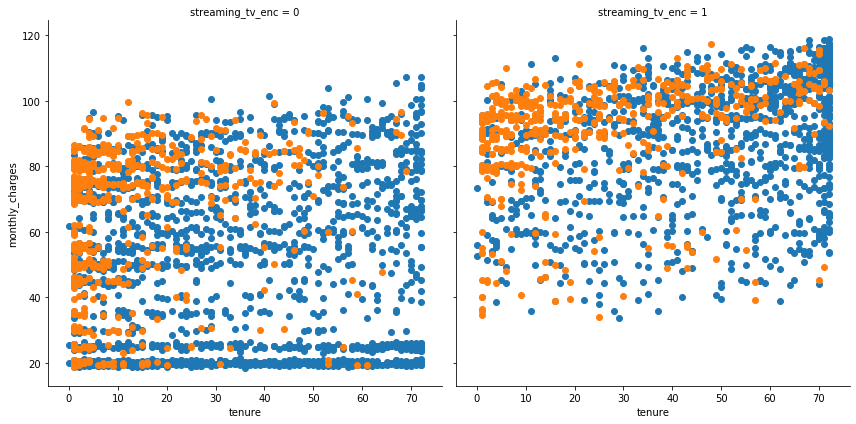

In [14]:
g = sns.FacetGrid(df, col="streaming_tv_enc", hue='churn', margin_titles=True, height=h)
g.map(plt.scatter, "tenure", "monthly_charges")

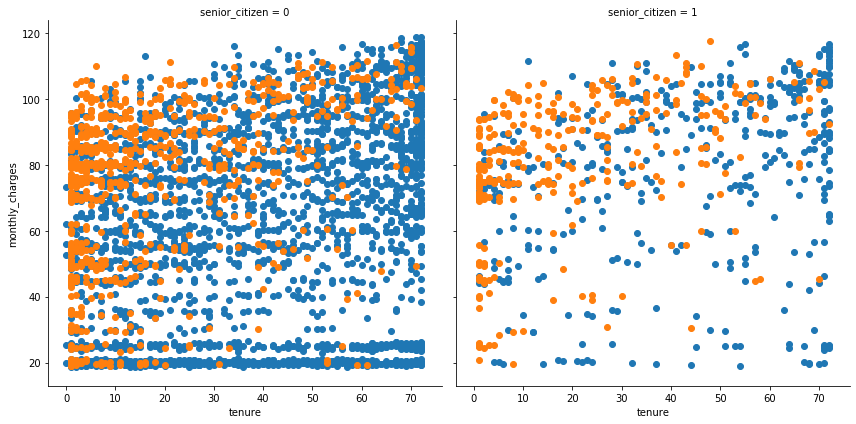

In [15]:
g = sns.FacetGrid(df, col="senior_citizen", hue='churn', margin_titles=True, height=h)
g.map(plt.scatter, "tenure", "monthly_charges")

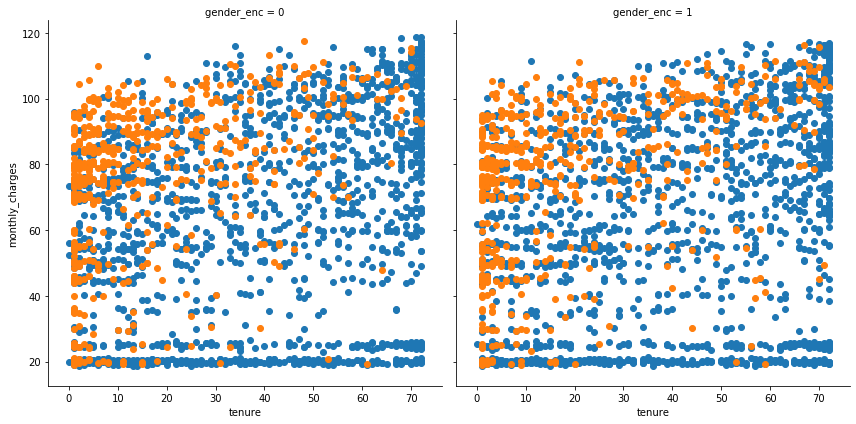

In [16]:
g = sns.FacetGrid(df, col="gender_enc", hue='churn', margin_titles=True, height=h)
g.map(plt.scatter, "tenure", "monthly_charges")

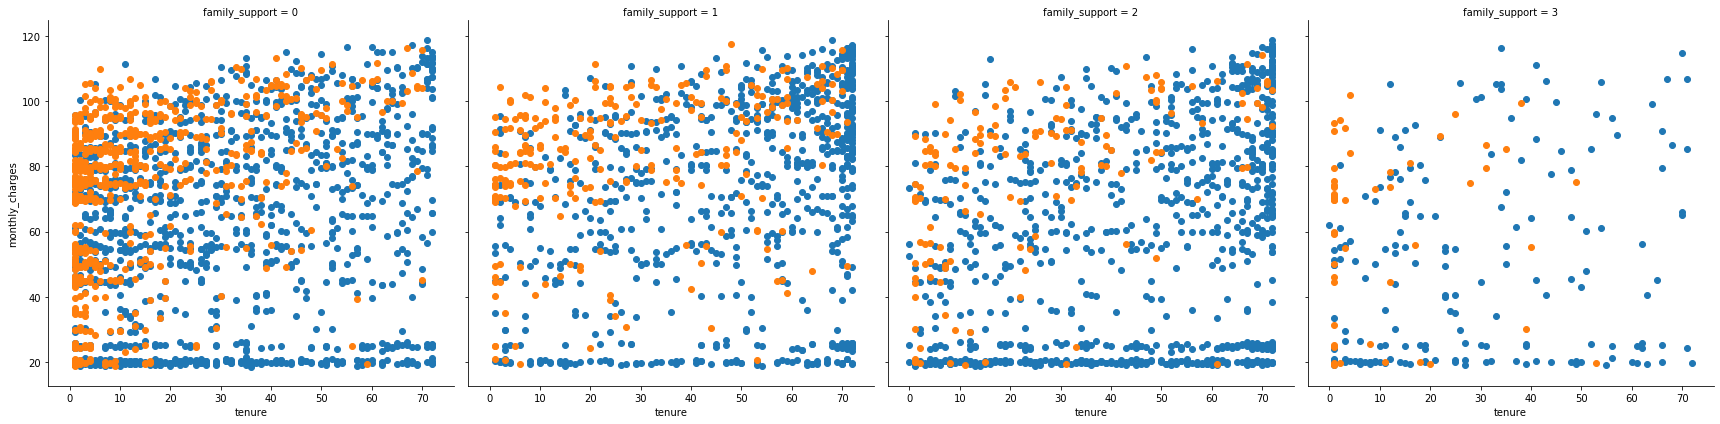

In [17]:
g = sns.FacetGrid(df, col="family_support", hue='churn', margin_titles=True, height=h)
g.map(plt.scatter, "tenure", "monthly_charges")

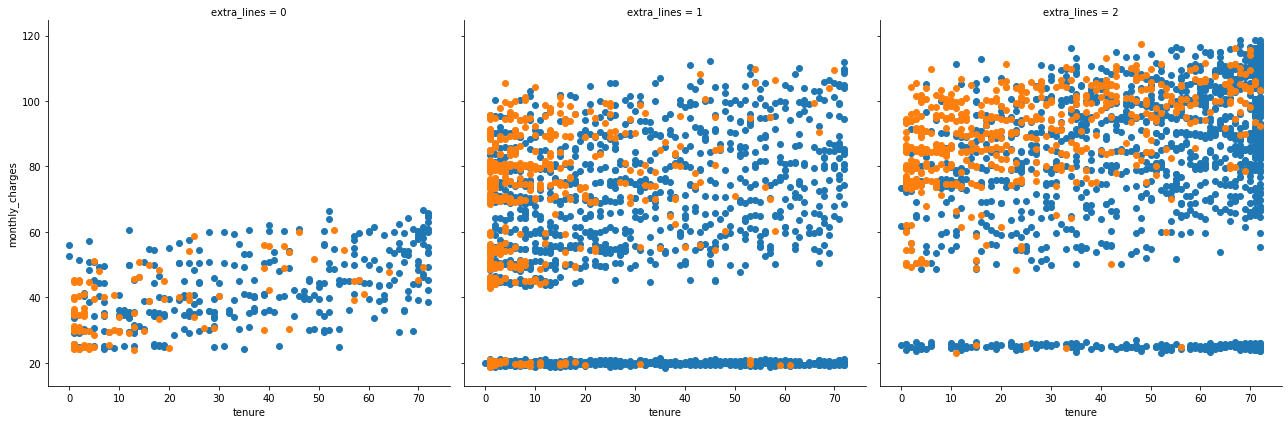

In [18]:
g = sns.FacetGrid(df, col="extra_lines", hue='churn', margin_titles=True, height=h)
g.map(plt.scatter, "tenure", "monthly_charges")

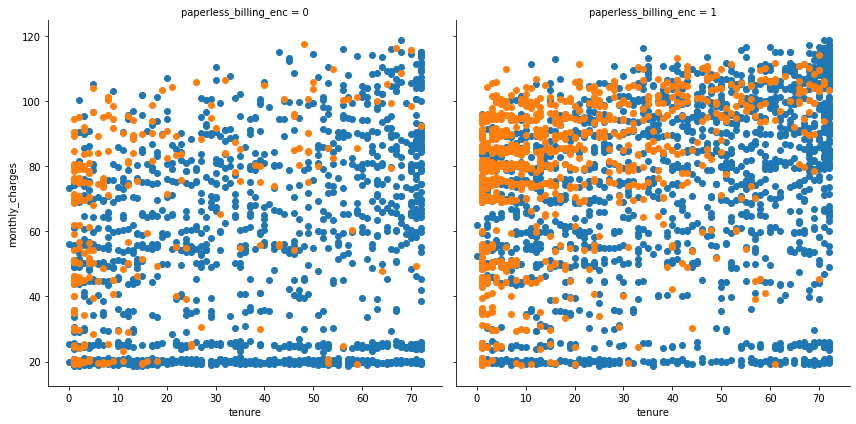

In [19]:
g = sns.FacetGrid(df, col="paperless_billing_enc", hue='churn', margin_titles=True, height=h)
g.map(plt.scatter, "tenure", "monthly_charges")

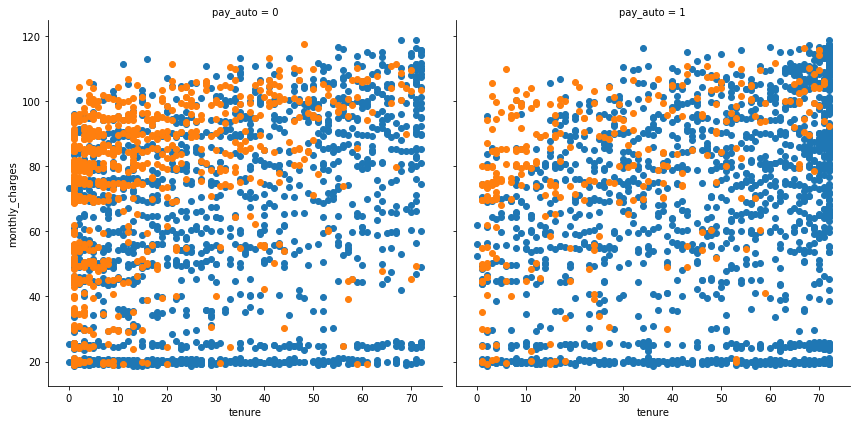

In [20]:
g = sns.FacetGrid(df, col="pay_auto", hue='churn', margin_titles=True, height=h)
g.map(plt.scatter, "tenure", "monthly_charges")

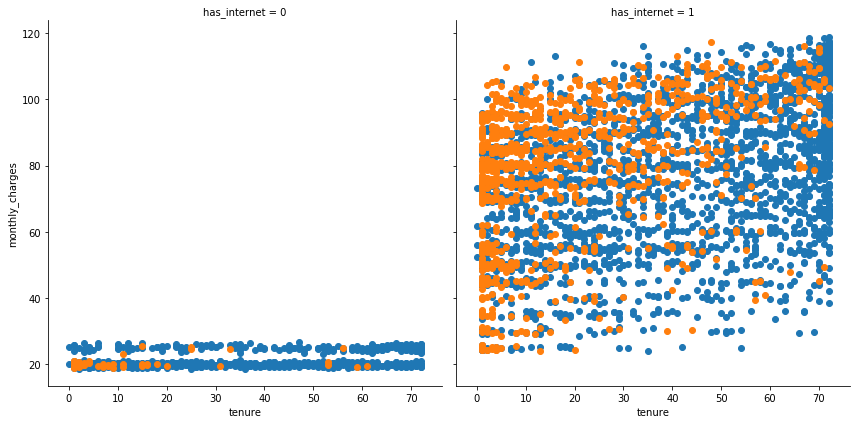

In [21]:
g = sns.FacetGrid(df, col="has_internet", hue='churn', margin_titles=True, height=h)
g.map(plt.scatter, "tenure", "monthly_charges")

In [22]:
num_DSL_online_sec = DSL2[df.online_security_enc == 1].shape[0]
DSL_online_sec_churn = DSL2[df.online_security_enc == 1][df.churn == 'Yes'].shape[0]
DSL_online_sec_rate = (DSL_online_sec_churn / num_DSL_online_sec)

num_FO_online_sec = FO2[df.online_security_enc == 1].shape[0]
FO_online_sec_churn = FO2[df.online_security_enc == 1][df.churn == 'Yes'].shape[0]
FO_online_sec_rate = (FO_online_sec_churn / num_FO_online_sec)

num_DSL_tech = DSL2[df.tech_support_enc == 1].shape[0]
DSL_tech_churn = DSL2[df.tech_support_enc == 1][df.churn == 'Yes'].shape[0]
DSL_tech_rate = (DSL_tech_churn / num_DSL_tech)

num_FO_tech = FO2[df.tech_support_enc == 1].shape[0]
FO_tech_churn = FO2[df.tech_support_enc == 1][df.churn == 'Yes'].shape[0]
FO_tech_rate = (FO_tech_churn / num_FO_tech)

num_DSL_backup = DSL2[df.online_backup_enc == 1].shape[0]
DSL_backup_churn = DSL2[df.online_backup_enc == 1][df.churn == 'Yes'].shape[0]
DSL_backup_rate = (DSL_backup_churn / num_DSL_backup)

num_FO_backup = FO2[df.online_backup_enc == 1].shape[0]
FO_backup_churn = FO2[df.online_backup_enc == 1][df.churn == 'Yes'].shape[0]
FO_backup_rate = (FO_backup_churn / num_FO_backup)

num_DSL_dev_prot = DSL2[df.device_protection_enc == 1].shape[0]
DSL_dev_prot_churn = DSL2[df.device_protection_enc == 1][df.churn == 'Yes'].shape[0]
DSL_dev_prot_rate = (DSL_dev_prot_churn / num_DSL_dev_prot)

num_FO_dev_prot = FO2[df.device_protection_enc == 1].shape[0]
FO_dev_prot_churn = FO2[df.device_protection_enc == 1][df.churn == 'Yes'].shape[0]
FO_dev_prot_rate = (FO_dev_prot_churn / num_FO_dev_prot)

num_DSL_strm_tv = DSL2[df.streaming_tv_enc == 1].shape[0]
strm_DSL_tv_churn = DSL2[df.streaming_tv_enc == 1][df.churn == 'Yes'].shape[0]
strm_DSL_tv_rate = (strm_DSL_tv_churn / num_DSL_strm_tv)

num_FO_strm_tv = FO2[df.streaming_tv_enc == 1].shape[0]
strm_FO_tv_churn = FO2[df.streaming_tv_enc == 1][df.churn == 'Yes'].shape[0]
strm_FO_tv_rate = (strm_FO_tv_churn / num_FO_strm_tv)

num_DSL_strm_mv = DSL2[df.streaming_movies_enc == 1].shape[0]
strm_DSL_mv_churn = DSL2[df.streaming_movies_enc == 1][df.churn == 'Yes'].shape[0]
strm_DSL_mv_rate = (strm_DSL_mv_churn / num_DSL_strm_mv)

num_FO_strm_mv = FO2[df.streaming_movies_enc == 1].shape[0]
strm_FO_mv_churn = FO2[df.streaming_movies_enc == 1][df.churn == 'Yes'].shape[0]
strm_FO_mv_rate = (strm_FO_mv_churn / num_FO_strm_mv)

print ('DSL Churn rates')
print (f'Rate of churn for people who have DSL and online security: {DSL_online_sec_rate}')
print (f'Rate of churn for people who have DSL and tech support: {DSL_tech_rate}')
print (f'Rate of churn for people who have DSL and online backup: {DSL_backup_rate}')
print (f'Rate of churn for people who have DSL and device protection: {DSL_dev_prot_rate}')
print (f'Rate of churn for people who have DSL and streaming tv: {strm_DSL_tv_rate}')
print (f'Rate of churn for people who have DSL and streaming movies: {strm_DSL_mv_rate}')
print ('-----------------------')
print ('Fiber Optic Churn Rates')
print (f'Rate of churn for people who have Fiber Optic and online security: {FO_online_sec_rate}')
print (f'Rate of churn for people who have Fiber Optic and tech support: {FO_tech_rate}')
print (f'Rate of churn for people who have Fiber Optic and online backup: {FO_backup_rate}')
print (f'Rate of churn for people who have Fiber Optic and device protection: {FO_dev_prot_rate}')
print (f'Rate of churn for people who have Fiber Optic and streaming tv: {strm_FO_tv_rate}')
print (f'Rate of churn for people who have Fiber Optic and streaming movies: {strm_FO_mv_rate}')

DSL Churn rates
Rate of churn for people who have DSL and online security: 0.2895927601809955
Rate of churn for people who have DSL and tech support: 0.2958057395143488
Rate of churn for people who have DSL and online backup: 0.3854166666666667
Rate of churn for people who have DSL and device protection: 0.42356687898089174
Rate of churn for people who have DSL and streaming tv: 0.4993924665856622
Rate of churn for people who have DSL and streaming movies: 0.5123152709359606
-----------------------
Fiber Optic Churn Rates
Rate of churn for people who have Fiber Optic and online security: 0.09322033898305085
Rate of churn for people who have Fiber Optic and tech support: 0.11396011396011396
Rate of churn for people who have Fiber Optic and online backup: 0.11508951406649616
Rate of churn for people who have Fiber Optic and device protection: 0.11166253101736973
Rate of churn for people who have Fiber Optic and streaming tv: 0.15942028985507245
Rate of churn for people who have Fiber Opt

In [23]:
# Since there are some variations in churn raate among services, I'll look at each individually. I needed to add those columns back into the train df

In [24]:
# DSL with onliine security and no phone
dsl_online_security =DSL[DSL.online_security_enc == 1].churn_enc
dsl_no_online_security =DSL[DSL.online_security_enc != 1].churn_enc

stats.ttest_ind(dsl_online_security, dsl_no_online_security)

Ttest_indResult(statistic=-1.825005512336962, pvalue=0.06918398576024387)

In [25]:
# DSL with onliine security and phone
dsl_online_security_and_phone =DSL2[DSL2.online_security_enc == 1].churn_enc
dsl_no_online_security_and_phone =DSL2[DSL2.online_security_enc != 1].churn_enc

dsp_s, dsp_p = stats.ttest_ind(dsl_online_security_and_phone, dsl_no_online_security_and_phone)

In [26]:
dsp_p

1.8549818656120436e-10

In [27]:
# DSL with tech support and no phone
dsl_tech_support =DSL[DSL.tech_support_enc == 1].churn_enc
dsl_no_tech_support =DSL[DSL.tech_support_enc != 1].churn_enc

stats.ttest_ind(dsl_tech_support, dsl_no_tech_support)

Ttest_indResult(statistic=-1.878995431806769, pvalue=0.06139929405477475)

In [81]:
# DSL with tech support and phone
dsl_tech_support_and_phone =DSL2[DSL2.tech_support_enc == 1].churn_enc
dsl_no_tech_support_and_phone =DSL2[DSL2.tech_support_enc != 1].churn_enc

dtsp_s, dtsp_p = stats.ttest_ind(dsl_tech_support_and_phone, dsl_no_tech_support_and_phone)

In [82]:
dtsp_p

6.794267127799732e-10

In [29]:
# DSL with tech support and no phone
dsl_online_backup =DSL[DSL.online_backup_enc == 1].churn_enc
dsl_no_online_backup =DSL[DSL.online_backup_enc != 1].churn_enc

stats.ttest_ind(dsl_tech_support, dsl_no_tech_support)

Ttest_indResult(statistic=-1.878995431806769, pvalue=0.06139929405477475)

In [30]:
# DSL with tech support and phone
dsl_online_backup_and_phone =DSL2[DSL2.online_backup_enc == 1].churn_enc
dsl_no_online_backup_and_phone =DSL2[DSL2.online_backup_enc != 1].churn_enc

stats.ttest_ind(dsl_online_backup_and_phone, dsl_no_online_backup_and_phone)

Ttest_indResult(statistic=-2.434267726090817, pvalue=0.014991490510080469)

In [31]:
# DSL with device protection but no phone
dsl_dev_pro =DSL[DSL.device_protection_enc == 1].churn_enc
dsl_no_dev_pro =DSL[DSL.device_protection_enc != 1].churn_enc

stats.ttest_ind(dsl_dev_pro, dsl_no_dev_pro)

Ttest_indResult(statistic=-1.092245003702554, pvalue=0.2757685316546388)

In [32]:
# DSL with device protection and phone
dsl_dev_pro_and_phone =DSL2[df.device_protection_enc == 1].churn_enc
dsl_no_dev_pro_and_phone =DSL2[df.device_protection_enc != 1].churn_enc

stats.ttest_ind(dsl_dev_pro_and_phone, dsl_no_dev_pro_and_phone)

Ttest_indResult(statistic=-0.0891661496372275, pvalue=0.9289570061941474)

In [33]:
dsl_stream_tv =DSL[DSL.streaming_tv_enc == 1].churn_enc
dsl_no_stream_tv =DSL[DSL.streaming_tv_enc != 1].churn_enc

stats.ttest_ind(dsl_stream_tv, dsl_no_stream_tv)

Ttest_indResult(statistic=0.08079297850893029, pvalue=0.9356707195897245)

In [34]:
dsl_stream_tv_and_phone =DSL2[DSL2.streaming_tv_enc == 1].churn_enc
dsl_no_stream_tv_and_phone =DSL2[DSL2.streaming_tv_enc != 1].churn_enc

dstp_s, dstp_p = stats.ttest_ind(dsl_stream_tv_and_phone, dsl_no_stream_tv_and_phone)

In [79]:
dstp_p

1.3269530198687538e-07

In [36]:
dsl_stream_movie =DSL[DSL.streaming_movies_enc == 1].churn_enc
dsl_no_stream_movie =DSL[DSL.streaming_movies_enc != 1].churn_enc

stats.ttest_ind(dsl_stream_movie, dsl_no_stream_movie)

Ttest_indResult(statistic=0.7440366939449631, pvalue=0.45754747352406766)

In [37]:
dsl_stream_movie_and_phone =DSL2[DSL2.streaming_movies_enc == 1].churn_enc
dsl_no_stream_movie_and_phone =DSL2[DSL2.streaming_movies_enc != 1].churn_enc

dsm_s, dsm_p = stats.ttest_ind(dsl_stream_movie_and_phone, dsl_no_stream_movie_and_phone)

In [80]:
dsm_p

8.409911888121787e-10

- fiber with additional features

In [38]:
# Fiber with onliine security and no phone
fiber_online_security =FO[FO.online_security_enc == 1].churn_enc
fiber_no_online_security =FO[FO.online_security_enc != 1].churn_enc

stats.ttest_ind(fiber_online_security, fiber_no_online_security)

Ttest_indResult(statistic=-2.095345016872846, pvalue=0.03911561733885068)

In [39]:
# Fiber with onliine security and phone
fiber_online_security_and_phone =FO2[FO2.online_security_enc == 1].churn_enc
fiber_no_online_security_and_phone =FO2[FO2.online_security_enc != 1].churn_enc

stats.ttest_ind(fiber_online_security_and_phone, fiber_no_online_security_and_phone)

Ttest_indResult(statistic=-0.3976289026179636, pvalue=0.6909945127829338)

In [40]:
# Fiber with tech support and no phone
fiber_tech_support =FO[FO.tech_support_enc == 1].churn_enc
fiber_no_tech_support =FO[FO.tech_support_enc != 1].churn_enc

stats.ttest_ind(fiber_tech_support, fiber_no_tech_support)

Ttest_indResult(statistic=-1.27562009544375, pvalue=0.20556498486867544)

In [41]:
# Fiber with tech support and phone
fiber_tech_support_and_phone =FO2[FO2.tech_support_enc == 1].churn_enc
fiber_no_tech_support_and_phone =FO2[FO2.tech_support_enc != 1].churn_enc

stats.ttest_ind(fiber_tech_support_and_phone, fiber_no_tech_support_and_phone)

Ttest_indResult(statistic=1.2555874358570638, pvalue=0.20957927040011534)

In [42]:
# Fiber with tech support and no phone
fiber_online_backup =FO[FO.online_backup_enc == 1].churn_enc
fiber_no_online_backup =FO[FO.online_backup_enc != 1].churn_enc

stats.ttest_ind(fiber_tech_support, fiber_no_tech_support)

Ttest_indResult(statistic=-1.27562009544375, pvalue=0.20556498486867544)

In [43]:
# Fiber with tech support and phone
fiber_online_backup_and_phone =FO2[FO2.online_backup_enc == 1].churn_enc
fiber_no_online_backup_and_phone =FO2[FO2.online_backup_enc != 1].churn_enc

stats.ttest_ind(fiber_online_backup_and_phone, fiber_no_online_backup_and_phone)

Ttest_indResult(statistic=1.4716424669376373, pvalue=0.14145393443033033)

In [44]:
# Fiber with device protection but no phone
fiber_dev_pro =FO[FO.device_protection_enc == 1].churn_enc
fiber_no_dev_pro =FO[FO.device_protection_enc != 1].churn_enc

stats.ttest_ind(fiber_dev_pro, fiber_no_dev_pro)

Ttest_indResult(statistic=-0.01811592104517575, pvalue=0.9855888333750679)

In [45]:
# Fiber with device protection and phone
fiber_dev_pro_and_phone =FO2[FO2.device_protection_enc == 1].churn_enc
fiber_no_dev_pro_and_phone =FO2[FO2.device_protection_enc != 1].churn_enc

stats.ttest_ind(fiber_dev_pro_and_phone, fiber_no_dev_pro_and_phone)

Ttest_indResult(statistic=1.2040076417267274, pvalue=0.22889133716640256)

In [46]:
# Fiber with streaming tv and phone
fiber_stream_tv =FO[FO.streaming_tv_enc == 1].churn_enc
fiber_no_stream_tv =FO[FO.streaming_tv_enc != 1].churn_enc

stats.ttest_ind(fiber_stream_tv, fiber_no_stream_tv)

Ttest_indResult(statistic=1.8291882830475947, pvalue=0.07087800902827367)

In [47]:
# Fiber with streaming tv and phone
fiber_stream_tv_and_phone =FO2[FO2.streaming_tv_enc == 1].churn_enc
fiber_no_stream_tv_and_phone =FO2[FO2.streaming_tv_enc != 1].churn_enc

fstp_s, fstp_p = stats.ttest_ind(fiber_stream_tv_and_phone, fiber_no_stream_tv_and_phone)

In [48]:
fstp_p

1.654185318561689e-08

In [49]:
# Fiber with streaming movies and phone
fiber_stream_movie =FO[FO.streaming_movies_enc == 1].churn_enc
fiber_no_stream_movie =FO[FO.streaming_movies_enc != 1].churn_enc

stats.ttest_ind(fiber_stream_movie, fiber_no_stream_movie)

Ttest_indResult(statistic=2.095345016872846, pvalue=0.03911561733885068)

In [50]:
# Fiber with streaming movies and phone
fiber_stream_movie_and_phone =FO2[FO2.streaming_movies_enc == 1].churn_enc
fiber_no_stream_movie_and_phone =FO2[FO2.streaming_movies_enc != 1].churn_enc

fsmp_s, fsmp_p = stats.ttest_ind(fiber_stream_movie_and_phone, fiber_no_stream_movie_and_phone)

In [51]:
fsmp_p

4.641154347014604e-10

print('The following combination were found to significant:')
print(f'Aplha: {alpha}')
print('- DSL with online secuirty and phone p-value: {:.3f}'.format(dsp_p))
print('- DSL with streaming tv and phone p-value: {:.3f}'.format(dstp_p))
print('- DSL with streaming movies p-value: {:.3f}'.format(dsm_p))
print('- DSL with steaming tv and phone p-value: {:.3f}'.format(fstp_p))
print('- DSL with streaming movies and phone p-value: {:.3f}'.format(fsmp_p))

In [53]:
# Churn rate by contract type
month_to_month_churn_rate = ((df.churn == 'Yes') & (df.contract_type_id == 1)).sum() / (df.churn == 'Yes').sum()
one_year_churn_rate = ((df.churn == 'Yes') & (df.contract_type_id == 2)).sum() / (df.churn == 'Yes').sum()
two_year_churn_rate = ((df.churn == 'Yes') & (df.contract_type_id == 3)).sum() / (df.churn == 'Yes').sum()

print('Churn rates by contract type:')
print('- Month-to-month has a {:.2f}% turn over rate'.format(month_to_month_churn_rate * 100))
print('- One year has a {:.2f}% turn over rate'.format(one_year_churn_rate * 100))
print('- Two has a {:.2f}% turn over rate'.format(two_year_churn_rate * 100))

Churn rates by contract type:
- Month-to-month has a 89.64% turn over rate
- One year has a 7.75% turn over rate
- Two has a 2.61% turn over rate


#### ~ Out of all the customers that have churned, month-to-month contracts have the highest rate

### How is month-to-month impacted by payment range?

In [54]:
one_to_twenty_churn_rate = ((df.churn == 'Yes') & (df.contract_type_id == 1) & (df.monthly_charges_group == 'one_to_twenty')).sum() / (df.churn == 'Yes').sum()
twenty_one_to_thirty_churn_rate = ((df.churn == 'Yes') & (df.contract_type_id == 1) & (df.monthly_charges_group == 'twenty_one_to_thirty')).sum() / (df.churn == 'Yes').sum()
thirty_one_to_forty_churn_rate = ((df.churn == 'Yes') & (df.contract_type_id == 1) & (df.monthly_charges_group == 'thirty_one_to_forty')).sum() / (df.churn == 'Yes').sum()
forty_one_to_fifty_churn_rate = ((df.churn == 'Yes') & (df.contract_type_id == 1) & (df.monthly_charges_group == 'forty_one_to_fifty')).sum() / (df.churn == 'Yes').sum()
fifty_one_to_sixty_churn_rate = ((df.churn == 'Yes') & (df.contract_type_id == 1) & (df.monthly_charges_group == 'fifty_one_to_sixty')).sum() / (df.churn == 'Yes').sum()
sixty_one_to_seventy_churn_rate = ((df.churn == 'Yes') & (df.contract_type_id == 1) & (df.monthly_charges_group == 'sixty_one_to_seventy')).sum() / (df.churn == 'Yes').sum()
seventy_one_to_eighty_churn_rate = ((df.churn == 'Yes') & (df.contract_type_id == 1) & (df.monthly_charges_group == 'seventy_one_to_eighty')).sum() / (df.churn == 'Yes').sum()
eighty_one_to_ninety_churn_rate = ((df.churn == 'Yes') & (df.contract_type_id == 1) & (df.monthly_charges_group == 'eighty_one_to_ninety')).sum() / (df.churn == 'Yes').sum()
ninety_one_to_one_hundred_churn_rate = ((df.churn == 'Yes') & (df.contract_type_id == 1) & (df.monthly_charges_group == 'ninety_one_to_one_hundred')).sum() / (df.churn == 'Yes').sum()
one_hundred_one_to_one_hundred_ten_churn_rate = ((df.churn == 'Yes') & (df.contract_type_id == 1) & (df.monthly_charges_group == 'one_hundred_to_one_hundred_ten')).sum() / (df.churn == 'Yes').sum()
one_hundred_eleven_to_hundred_twenty_churn_rate = ((df.churn == 'Yes') & (df.contract_type_id == 1) & (df.monthly_charges_group == 'one_hundred_eleven_to_hundred_twenty')).sum() / (df.churn == 'Yes').sum()
more_then_one_hundred_twenty_churn_rate = ((df.churn == 'Yes') & (df.contract_type_id == 1) & (df.monthly_charges_group == 'more_then_one_hundred_twenty')).sum() / (df.churn == 'Yes').sum()
zero_churn_rate = ((df.churn == 'Yes') & (df.contract_type_id == 1) & (df.monthly_charges_group == 'zero')).sum() / (df.churn == 'Yes').sum()

In [55]:
m2m_churn_of_all_churn = \
one_to_twenty_churn_rate + \
twenty_one_to_thirty_churn_rate + \
thirty_one_to_forty_churn_rate + \
forty_one_to_fifty_churn_rate + \
fifty_one_to_sixty_churn_rate + \
sixty_one_to_seventy_churn_rate + \
seventy_one_to_eighty_churn_rate + \
eighty_one_to_ninety_churn_rate + \
ninety_one_to_one_hundred_churn_rate + \
one_hundred_one_to_one_hundred_ten_churn_rate + \
one_hundred_eleven_to_hundred_twenty_churn_rate + \
more_then_one_hundred_twenty_churn_rate + \
zero_churn_rate

In [56]:
print('Churn rates by Month-to-month  and monthly groups:')
print('- {:.2f}%: Month-to-month and one_to_twenty_churn_rate'.format(one_to_twenty_churn_rate * 100))
print('- {:.2f}%: Month-to-month and twenty_one_to_thirty_churn_rate'.format(twenty_one_to_thirty_churn_rate * 100))
print('- {:.2f}%: Month-to-month and thirty_one_to_forty_churn_rate'.format(thirty_one_to_forty_churn_rate * 100))
print('- {:.2f}%: Month-to-month and forty_one_to_fifty_churn_rate'.format(forty_one_to_fifty_churn_rate * 100))
print('- {:.2f}%: Month-to-month and fifty_one_to_sixty_churn_rate'.format(fifty_one_to_sixty_churn_rate * 100))
print('- {:.2f}%: Month-to-month and sixty_one_to_seventy_churn_rate'.format(sixty_one_to_seventy_churn_rate * 100))
print('- {:.2f}%: Month-to-month and seventy_one_to_eighty_churn_rate'.format(seventy_one_to_eighty_churn_rate * 100))
print('- {:.2f}%: Month-to-month and eighty_one_to_ninety_churn_rate'.format(eighty_one_to_ninety_churn_rate * 100))
print('- {:.2f}%: Month-to-month and ninety_one_to_one_hundred_churn_rate'.format(ninety_one_to_one_hundred_churn_rate * 100))
print('- {:.2f}%: Month-to-month and one_hundred_one_to_one_hundred_ten_churn_rate'.format(one_hundred_one_to_one_hundred_ten_churn_rate * 100))
print('- {:.3f}%: Month-to-month and one_hundred_eleven_to_hundred_twenty_churn_rate'.format(one_hundred_eleven_to_hundred_twenty_churn_rate * 100))
print('- {:.5f}%: Month-to-month and more_then_one_hundred_twenty_churn_rate'.format(more_then_one_hundred_twenty_churn_rate * 100))
print('- {:.5f}%: Month-to-month and zero churn rate'.format(zero_churn_rate * 100))

Churn rates by Month-to-month  and monthly groups:
- 2.44%: Month-to-month and one_to_twenty_churn_rate
- 5.48%: Month-to-month and twenty_one_to_thirty_churn_rate
- 2.53%: Month-to-month and thirty_one_to_forty_churn_rate
- 7.67%: Month-to-month and forty_one_to_fifty_churn_rate
- 6.32%: Month-to-month and fifty_one_to_sixty_churn_rate
- 5.22%: Month-to-month and sixty_one_to_seventy_churn_rate
- 18.87%: Month-to-month and seventy_one_to_eighty_churn_rate
- 17.44%: Month-to-month and eighty_one_to_ninety_churn_rate
- 15.00%: Month-to-month and ninety_one_to_one_hundred_churn_rate
- 8.26%: Month-to-month and one_hundred_one_to_one_hundred_ten_churn_rate
- 0.421%: Month-to-month and one_hundred_eleven_to_hundred_twenty_churn_rate
- 0.00000%: Month-to-month and more_then_one_hundred_twenty_churn_rate
- 0.00000%: Month-to-month and zero churn rate


- payment amount effects month-to-month more between \\$70  to \\$100

#### - churn, month-to-month, and monthly_charges_group to telco population

In [57]:
overall_one_to_twenty_churn_rate = ((df.churn == 'Yes') & (df.contract_type_id == 1) & (df.monthly_charges_group == 'one_to_twenty')).sum() / df.shape[0]
overall_twenty_one_to_thirty_churn_rate = ((df.churn == 'Yes') & (df.contract_type_id == 1) & (df.monthly_charges_group == 'twenty_one_to_thirty')).sum() / df.shape[0]
overall_thirty_one_to_forty_churn_rate = ((df.churn == 'Yes') & (df.contract_type_id == 1) & (df.monthly_charges_group == 'thirty_one_to_forty')).sum() / df.shape[0]
overall_forty_one_to_fifty_churn_rate = ((df.churn == 'Yes') & (df.contract_type_id == 1) & (df.monthly_charges_group == 'forty_one_to_fifty')).sum() / df.shape[0]
overall_fifty_one_to_sixty_churn_rate = ((df.churn == 'Yes') & (df.contract_type_id == 1) & (df.monthly_charges_group == 'fifty_one_to_sixty')).sum() / df.shape[0]
overall_sixty_one_to_seventy_churn_rate = ((df.churn == 'Yes') & (df.contract_type_id == 1) & (df.monthly_charges_group == 'sixty_one_to_seventy')).sum() / df.shape[0]
overall_seventy_one_to_eighty_churn_rate = ((df.churn == 'Yes') & (df.contract_type_id == 1) & (df.monthly_charges_group == 'seventy_one_to_eighty')).sum() / df.shape[0]
overall_eighty_one_to_ninety_churn_rate = ((df.churn == 'Yes') & (df.contract_type_id == 1) & (df.monthly_charges_group == 'eighty_one_to_ninety')).sum() / df.shape[0]
overall_ninety_one_to_one_hundred_churn_rate = ((df.churn == 'Yes') & (df.contract_type_id == 1) & (df.monthly_charges_group == 'ninety_one_to_one_hundred')).sum() / df.shape[0]
overall_one_hundred_one_to_one_hundred_ten_churn_rate = ((df.churn == 'Yes') & (df.contract_type_id == 1) & (df.monthly_charges_group == 'one_hundred_to_one_hundred_ten')).sum() / df.shape[0]
overall_one_hundred_eleven_to_hundred_twenty_churn_rate = ((df.churn == 'Yes') & (df.contract_type_id == 1) & (df.monthly_charges_group == 'one_hundred_eleven_to_hundred_twenty')).sum() / df.shape[0]
overall_more_then_one_hundred_twenty_churn_rate = ((df.churn == 'Yes') & (df.contract_type_id == 1) & (df.monthly_charges_group == 'more_then_one_hundred_twenty')).sum() / df.shape[0]
overall_zero_churn_rate = ((df.churn == 'Yes') & (df.contract_type_id == 1) & (df.monthly_charges_group == 'zero')).sum() / df.shape[0]

In [58]:
overall_churn_rate = \
overall_one_to_twenty_churn_rate + \
overall_twenty_one_to_thirty_churn_rate + \
overall_thirty_one_to_forty_churn_rate + \
overall_forty_one_to_fifty_churn_rate + \
overall_fifty_one_to_sixty_churn_rate + \
overall_sixty_one_to_seventy_churn_rate + \
overall_seventy_one_to_eighty_churn_rate + \
overall_eighty_one_to_ninety_churn_rate + \
overall_ninety_one_to_one_hundred_churn_rate + \
overall_one_hundred_one_to_one_hundred_ten_churn_rate + \
overall_one_hundred_eleven_to_hundred_twenty_churn_rate + \
overall_more_then_one_hundred_twenty_churn_rate + \
overall_zero_churn_rate

In [59]:
print('Churn rates by Month-to-month  and monthly groups:')
print('- {:.2f}%: Month-to-month and overall_one_to_twenty_churn_rate'.format(overall_one_to_twenty_churn_rate * 100))
print('- {:.2f}%: Month-to-month and overall_twenty_one_to_thirty_churn_rate'.format(overall_twenty_one_to_thirty_churn_rate * 100))
print('- {:.2f}%: Month-to-month and overall_thirty_one_to_forty_churn_rate'.format(overall_thirty_one_to_forty_churn_rate * 100))
print('- {:.2f}%: Month-to-month and overall_forty_one_to_fifty_churn_rate'.format(overall_forty_one_to_fifty_churn_rate * 100))
print('- {:.2f}%: Month-to-month and overall_fifty_one_to_sixty_churn_rate'.format(overall_fifty_one_to_sixty_churn_rate * 100))
print('- {:.2f}%: Month-to-month and overall_sixty_one_to_seventy_churn_rate'.format(overall_sixty_one_to_seventy_churn_rate * 100))
print('- {:.2f}%: Month-to-month and overall_seventy_one_to_eighty_churn_rate'.format(overall_seventy_one_to_eighty_churn_rate * 100))
print('- {:.2f}%: Month-to-month and overall_eighty_one_to_ninety_churn_rate'.format(overall_eighty_one_to_ninety_churn_rate * 100))
print('- {:.2f}%: Month-to-month and overall_ninety_one_to_one_hundred_churn_rate'.format(overall_ninety_one_to_one_hundred_churn_rate * 100))
print('- {:.2f}%: Month-to-month and overall_one_hundred_one_to_one_hundred_ten_churn_rate'.format(overall_one_hundred_one_to_one_hundred_ten_churn_rate * 100))
print('- {:.5f}%: Month-to-month and overall_one_hundred_eleven_to_hundred_twenty_churn_rate'.format(overall_one_hundred_eleven_to_hundred_twenty_churn_rate * 100))
print('- {:.5f}%: Month-to-month and overall_more_then_one_hundred_twenty_churn_rate'.format(overall_more_then_one_hundred_twenty_churn_rate * 100))
print('- {:.5f}%: Month-to-month and overall_zero churn rate'.format(overall_zero_churn_rate * 100))

Churn rates by Month-to-month  and monthly groups:
- 0.64%: Month-to-month and overall_one_to_twenty_churn_rate
- 1.44%: Month-to-month and overall_twenty_one_to_thirty_churn_rate
- 0.67%: Month-to-month and overall_thirty_one_to_forty_churn_rate
- 2.02%: Month-to-month and overall_forty_one_to_fifty_churn_rate
- 1.66%: Month-to-month and overall_fifty_one_to_sixty_churn_rate
- 1.38%: Month-to-month and overall_sixty_one_to_seventy_churn_rate
- 4.97%: Month-to-month and overall_seventy_one_to_eighty_churn_rate
- 4.59%: Month-to-month and overall_eighty_one_to_ninety_churn_rate
- 3.95%: Month-to-month and overall_ninety_one_to_one_hundred_churn_rate
- 2.17%: Month-to-month and overall_one_hundred_one_to_one_hundred_ten_churn_rate
- 0.11094%: Month-to-month and overall_one_hundred_eleven_to_hundred_twenty_churn_rate
- 0.00000%: Month-to-month and overall_more_then_one_hundred_twenty_churn_rate
- 0.00000%: Month-to-month and overall_zero churn rate


In [60]:
df.monthly_charges_group.value_counts()

twenty_one_to_thirty                    641
seventy_one_to_eighty                   596
eighty_one_to_ninety                    587
ninety_one_to_one_hundred               546
one_hundred_to_one_hundred_ten          419
one_to_twenty                           411
fifty_one_to_sixty                      404
sixty_one_to_seventy                    344
forty_one_to_fifty                      306
one_hundred_eleven_to_hundred_twenty    131
thirty_one_to_forty                     122
Name: monthly_charges_group, dtype: int64

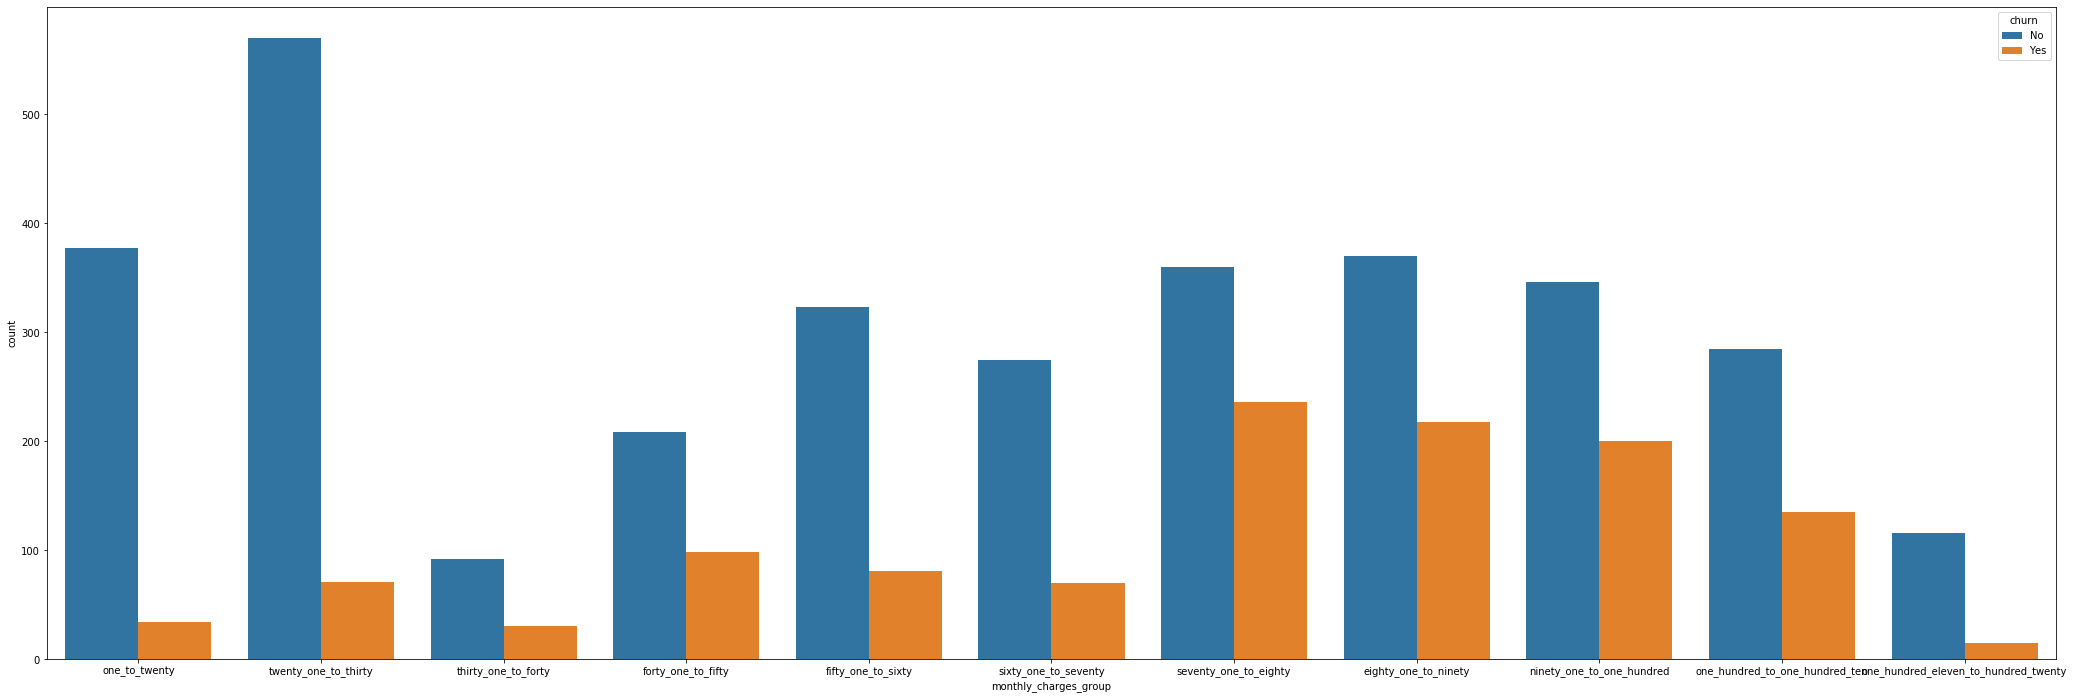

In [61]:
monthly_charges_group_list = ['one_to_twenty', 'twenty_one_to_thirty', 'thirty_one_to_forty', 'forty_one_to_fifty', 'fifty_one_to_sixty', 'sixty_one_to_seventy', 'seventy_one_to_eighty', \
                     'eighty_one_to_ninety', 'ninety_one_to_one_hundred', 'one_hundred_to_one_hundred_ten', 'one_hundred_eleven_to_hundred_twenty']


plt.figure(figsize=(36,12))
sns.countplot(x='monthly_charges_group', data=df, hue='churn', order = monthly_charges_group_list) 

# 3. Is there a price threshold for specific services where the likelihood of churn increases once price for those services goes past that point?
- $H_0$: There is no price threshold for specific services where the likelihood of churn increases
- $H_a$: Higher price phone services are more likeley to churn

# 4. If we looked at churn rate for month-to-month customers after the 12th month and that of 1-year contract customers after the 12th month, are those rates comparable?
- $H_0$: Month-to-month customers and 1-year contract customers are equally likely to churn after the 12th month
- $H_a$: Month-to-month customers are more likely to churn after the 12th month than 1-year contract customers
- $H_a$: 1-year contract customers are more likely to churn after the 12th month than month-to-month customers

In [63]:
m2m_churn_after_12th_month = df[df.tenure_group > 'one_year'][df.churn == 'Yes'][df.contract_type_id == 1].shape[0] / df[df.churn == 'Yes'].shape[0]
one_year_churn_after_12th_month = df[df.tenure_group > 'one_year'][df.churn == 'Yes'][df.contract_type_id == 2].shape[0] / df[df.churn == 'Yes'].shape[0]

m2m_churn_after_12th_month, one_year_churn_after_12th_month

(0.19039595619208088, 0.030328559393428812)

# 5. Additional exploration

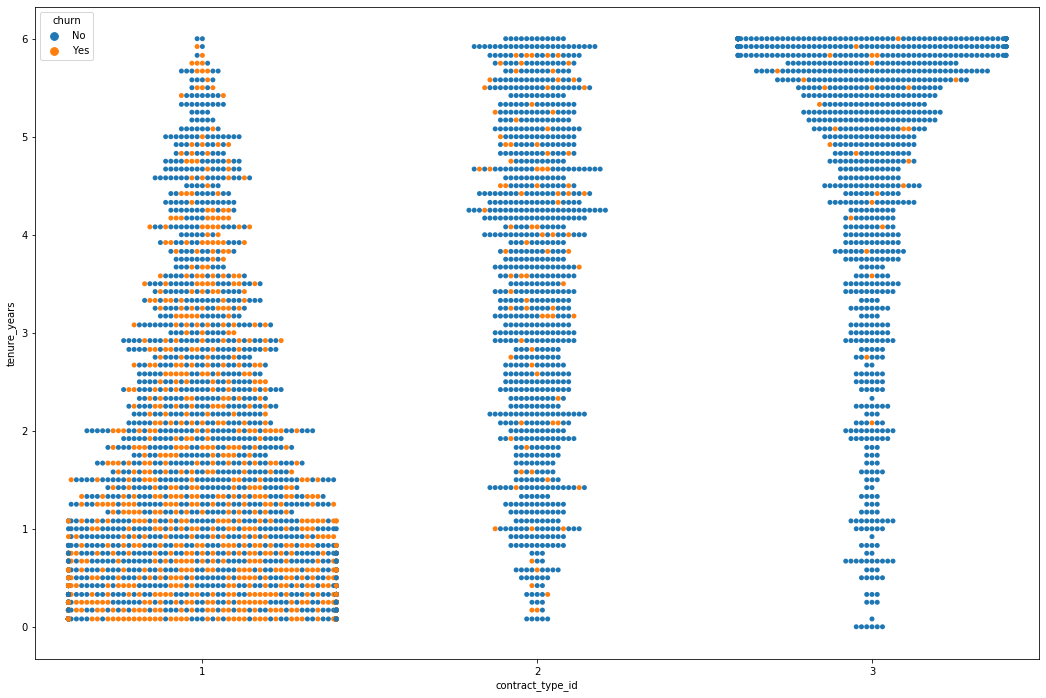

In [64]:
plt.figure(figsize=(18, 12))
sns.swarmplot(x='contract_type_id', y="tenure_years", data=df, hue='churn')
plt.show()

#### contract_type_id:
1. month_to_month
2. one_year
3. two_year

*month_to_month contracts appear to have a much larger churn rate compared to one_year and two_year*

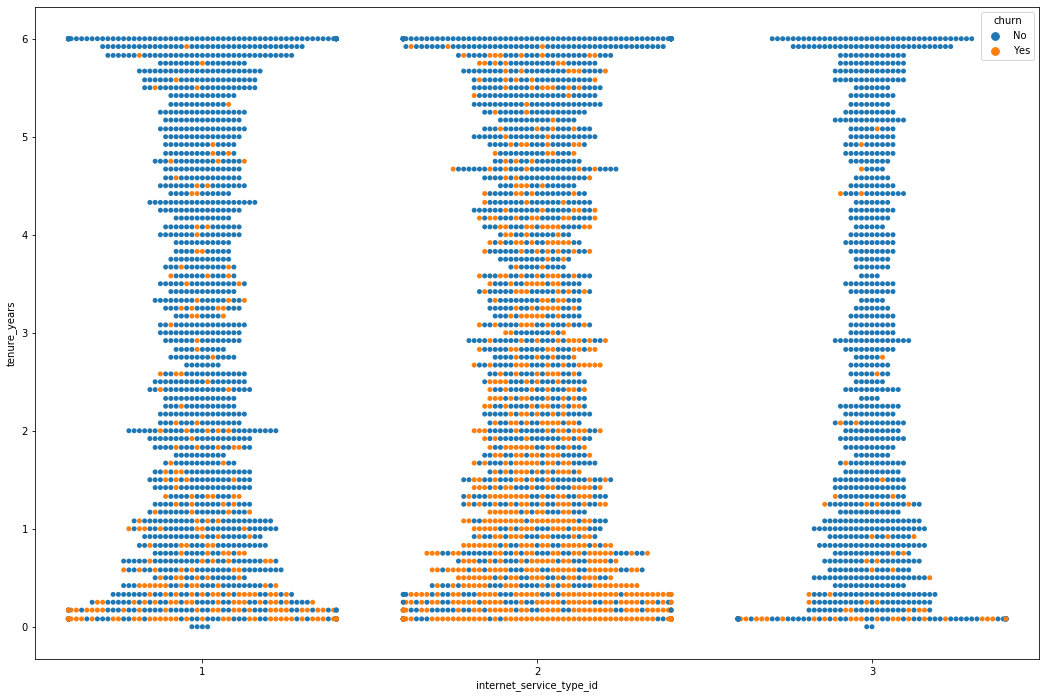

In [65]:
plt.figure(figsize=(18, 12))
sns.swarmplot(x='internet_service_type_id', y="tenure_years", data=df, hue='churn');
plt.show()

#### internet_service_type_id:
1. none
2. DSL
3. fiber

*DSL subscribers appear to have a higher churn rate then the other internet subscribers*

In [66]:
# Find rate of churn for people with phone service only, vs those with internet
# Number of people who churn out of those who have internet / All those with internet
churn_with_internet = df[df.has_internet == 1][df.churn == 'Yes'].shape[0]
all_with_internet = df[df.has_internet == 1].shape[0]

print(f'Churn rate for customers with internet: {churn_with_internet / all_with_internet}')

Churn rate for customers with internet: 0.3155668358714044


In [67]:
churn_phone_only = df[df.has_internet == 0][df.churn == 'Yes'].shape[0]
all_phone_only = df[df.has_internet == 0].shape[0]

print(f'Churn rate for customers with phone only: {churn_phone_only / all_phone_only}')

Churn rate for customers with phone only: 0.07075962539021852


### Consider the previous isolated to month-to-month contracts

In [68]:
all_churned = df[df.churn == 'Yes'].shape[0]
month_to_month_contract_churned = df[df.contract_type_id == 1][df.churn == 'Yes'].shape[0]
one_year_contrac_churned = df[df.contract_type_id == 2][df.churn == 'Yes'].shape[0]
two_year_contrac_churned = df[df.contract_type_id == 3][df.churn == 'Yes'].shape[0]

month_to_month_contract_churned_rate = month_to_month_contract_churned / all_churned
one_year_contrac_churned_rate = one_year_contrac_churned / all_churned
two_year_contrac_churned_rate = two_year_contrac_churned / all_churned

print ('Churn rate by contract types:')
print (f'Rate of churn for people with month to month contract: {month_to_month_contract_churned_rate}')
print (f'Rate of churn for people with one year contract: {one_year_contrac_churned_rate}')
print (f'Rate of churn for people with two year contrac: {two_year_contrac_churned_rate}\n')

Churn rate by contract types:
Rate of churn for people with month to month contract: 0.8963774220724515
Rate of churn for people with one year contract: 0.07750631844987363
Rate of churn for people with two year contrac: 0.02611625947767481



In [69]:
# month to month contract only
m2m = df[df.contract_type_id == 1].churn_enc
not_m2m =df[df.contract_type_id != 1].churn_enc

stats.ttest_ind(m2m, not_m2m)

Ttest_indResult(statistic=30.201451829885308, pvalue=1.2420537230402929e-182)

In [70]:
# one year contract only
one_yr = df[df.contract_type_id == 2].churn_enc
not_one_yr =df[df.contract_type_id != 2].churn_enc

stats.ttest_ind(one_yr, not_one_yr)

Ttest_indResult(statistic=-13.14036269520418, pvalue=9.887270121529457e-39)

In [71]:
# two year contract only
two_yr = df[df.contract_type_id == 3].churn_enc
not_two_yr =df[df.contract_type_id != 3].churn_enc

stats.ttest_ind(two_yr, not_two_yr)

Ttest_indResult(statistic=-20.820589719981523, pvalue=5.341192441803686e-92)

#### Customers who signed month to month contracts make up 84.4% of those that have churned

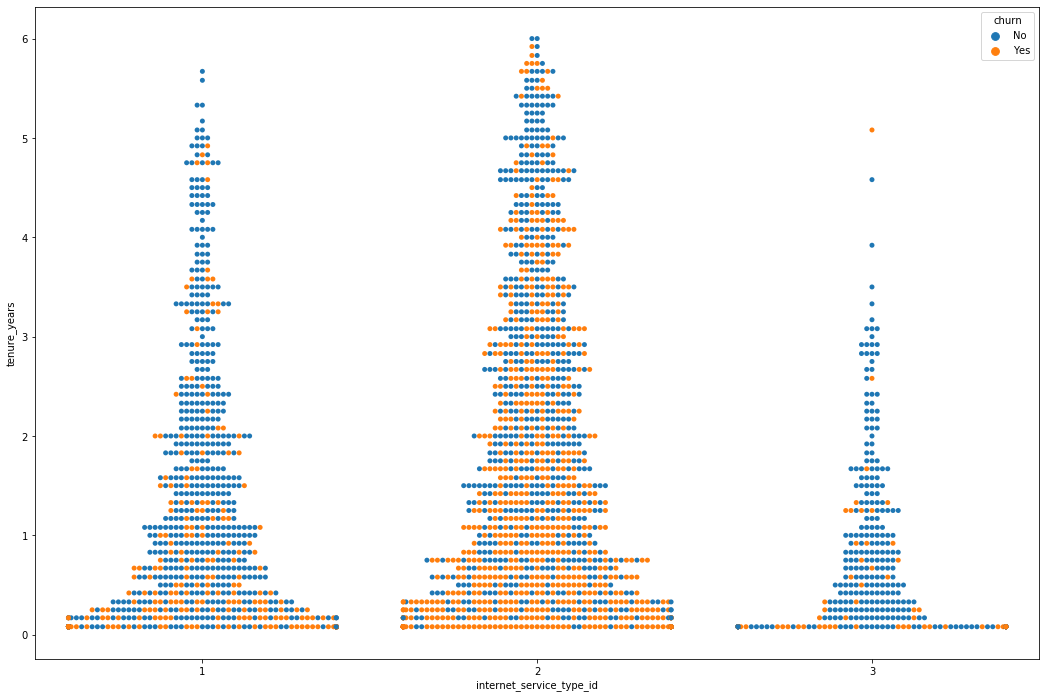

In [72]:
plt.figure(figsize=(18, 12))
sns.swarmplot(x='internet_service_type_id', y="tenure_years", data=df[df.contract_type_id == 1], hue='churn');

plt.show()

#### internet_service_type_id:
1. none
2. DSL
3. fiber

In [73]:
# How does 
churn_month_to_month_phone_only = df[df.has_internet == 0][df.churn == 'Yes'][df.contract_type_id == 1].shape[0]
churn_month_to_month_dsl_only = df[df.internet_service_type_id == 1][df.churn == 'Yes'][df.contract_type_id == 1].shape[0]
churn_month_to_month_fiber_only = df[df.internet_service_type_id == 2][df.churn == 'Yes'][df.contract_type_id == 1].shape[0]
all_phone_only = df[df.has_internet == 0][df.contract_type_id == 1].shape[0]
all_dsl_only = df[df.internet_service_type_id == 1][df.contract_type_id == 1].shape[0]
all_fiber_only = df[df.internet_service_type_id == 2][df.contract_type_id == 1].shape[0]

churn_month_to_month_phone_only_rate = churn_month_to_month_phone_only / all_phone_only
churn_month_to_month_dsl_only_rate = churn_month_to_month_dsl_only / all_dsl_only
churn_month_to_month_fiber_only_rate = churn_month_to_month_fiber_only / all_fiber_only

print ('Churn rates for month to month contracts:')
print (f'Rate of churn for people who have Phone service only: {churn_month_to_month_phone_only_rate}')
print (f'Rate of churn for people who have DSL only: {churn_month_to_month_dsl_only_rate}')
print (f'Rate of churn for people who have fiber: {churn_month_to_month_fiber_only_rate}\n')

Churn rates for month to month contracts:
Rate of churn for people who have Phone service only: 0.17592592592592593
Rate of churn for people who have DSL only: 0.31341463414634146
Rate of churn for people who have fiber: 0.5518763796909493



##### Churn by service type and contract type
- Month to month customers: 
    1. phone service only with apporx 18.3%
    2. DSL only with approx 33.6%
    3. fiber only with approx. 54.5%

In [74]:
# month to month only
phone_only_and_m2m = df[df.has_internet == 0][df.contract_type_id == 1].churn_enc
not_phone_only_and_m2m = df[df.has_internet == 1][df.contract_type_id == 1].churn_enc

phone_s, phone_p = stats.ttest_ind(phone_only_and_m2m, not_phone_only_and_m2m)
phone_s, phone_p

(-9.908473742635426, 9.969986603657114e-23)

In [75]:
# month to month only
dsl_and_m2m = df[df.internet_service_type_id == 1][df.contract_type_id == 1].churn_enc
not_dsl_and_m2m =df[df.internet_service_type_id != 1][df.contract_type_id == 1].churn_enc

dsl_s, dsl_p = stats.ttest_ind(dsl_and_m2m, not_dsl_and_m2m)
dsl_s, dsl_p

(-7.985564455979829, 2.112409155564694e-15)

In [76]:
# month to month only
fiber_and_m2m = df[df.internet_service_type_id == 2][df.contract_type_id == 1].churn_enc
not_fiber_and_m2m =df[df.internet_service_type_id != 1][df.contract_type_id == 1].churn_enc

fiber_s, fiber_p = stats.ttest_ind(fiber_and_m2m, not_fiber_and_m2m)
fiber_s, fiber_p

(3.9792448956400066, 7.074948206443898e-05)

In [77]:
higher_m2m_chrun = phone_p
service = 'month_to_month_phone_only'

if dsl_p < higher_m2m_chrun:
    higher_m2m_chrun = dsl_p
    service = 'month_to_month_dsl_only'
elif fiber_p < higher_m2m_chrun:
    higher_m2m_chrun = fiber_p
    service = 'month_to_month_fiber_only'  
    
if p < alpha:
    print(f'Since p-value {higher_m2m_chrun} is less the alpha {alpha}, we reject the null hypothesis that there are no cohorts with a higher churn rate then the others')
    print(f'{service} has the highest churn rate')

Since p-value 9.969986603657114e-23 is less the alpha 0.01, we reject the null hypothesis that there are no cohorts with a higher churn rate then the others
month_to_month_phone_only has the highest churn rate
